In [19]:
import pandas as pd

# The function of loading data and split them according to the 4 sensors
def load_and_split_data(filepath):
    df = pd.read_csv(filepath)
    df['time'] = pd.to_datetime(df['time']) 
    df['seconds'] = df['time'].dt.second + df['time'].dt.microsecond / 1e6 

    dfs = []
    for sh_id in ['rpi01', 'rpi02', 'rpi03', 'rpi04']:
        sub_df = df[df['sh_id'] == sh_id]
        dfs.append(sub_df)
        # print(f"Loaded DataFrame for {sh_id}, number of rows: {sub_df.shape[0]}") 

    return dfs


In [23]:
import matplotlib.pyplot as plt

# This function generates 36 subplots, 4 sensors * 9 measurements
def plot_sensor_measurements_comparison(dfs_list, measurements, title):
    num_sensors = 4  
    num_measurements = len(measurements) 

    fig, axes = plt.subplots(nrows=num_sensors, ncols=num_measurements, figsize=(num_measurements * 5, num_sensors * 4))

    # if you want to plot more than 2 files, you should change the color list here. 
    colors = ['r', 'g'] 
    

    for sensor_index in range(num_sensors):
        for measurement_index, measurement in enumerate(measurements):
            ax = axes[sensor_index, measurement_index] if num_sensors > 1 else axes[measurement_index]
            for file_index, file_dfs in enumerate(dfs_list):
                df = file_dfs[sensor_index]  
                ax.plot(df['seconds'], df[measurement], label=f'File {file_index + 1}', color=colors[file_index])
            ax.set_title(f'Sensor rpi0{sensor_index + 1} - {measurement}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Measurement Value')
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()



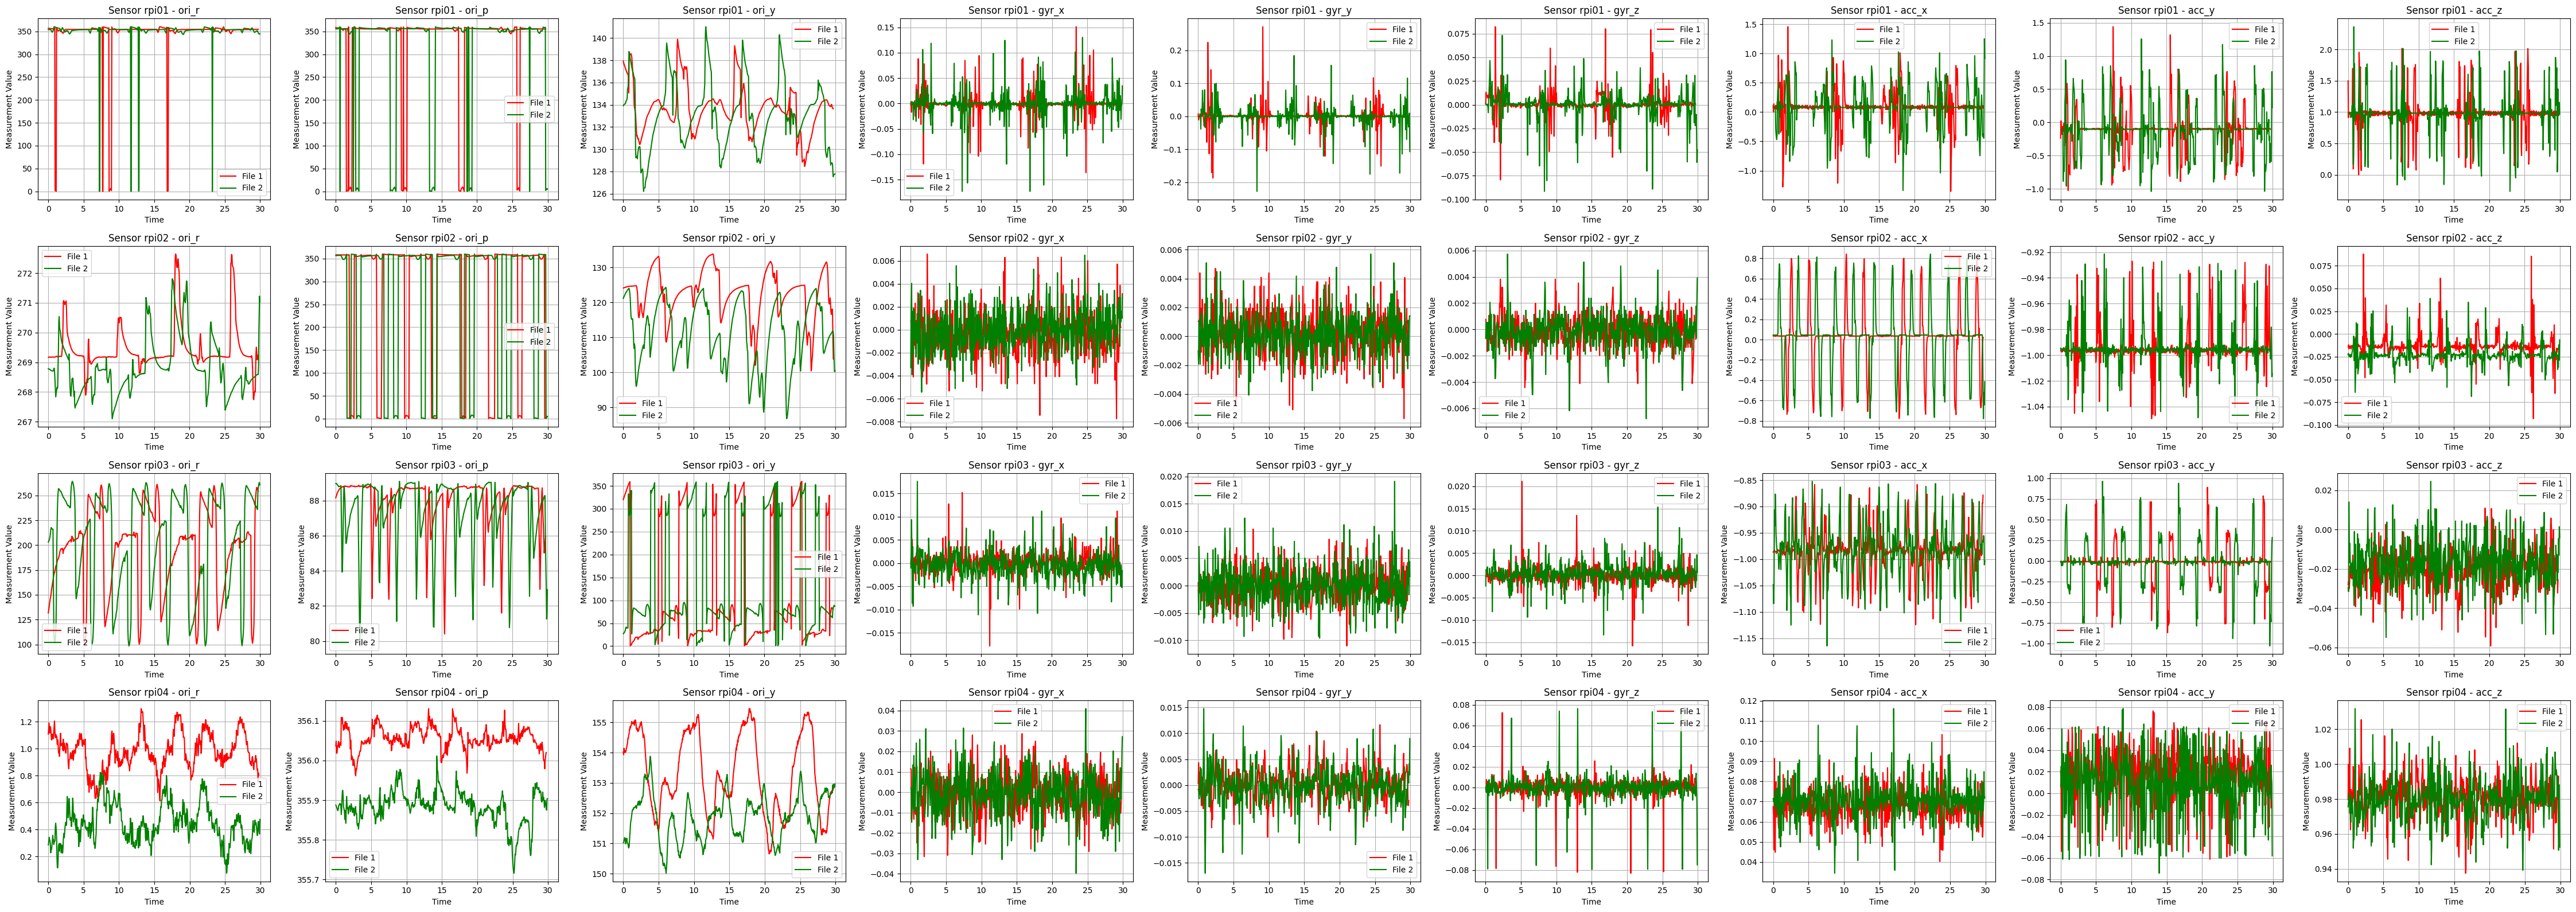

In [28]:
# Put the file name that you want to visualize here. The first file would be red in the plot and the second file would be green
files = ['data/0100.csv','data/0031.csv']
all_dfs = [load_and_split_data(file) for file in files]

measurements = ['ori_r', 'ori_p', 'ori_y', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_x', 'acc_y', 'acc_z']
plot_sensor_measurements_comparison(all_dfs, measurements, 'Comparison of Measurement Data across Files')